<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/myknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KERAS VERSION: 1.2.2

Cloning into 'MLxDL'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 83 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (83/83), 13.48 MiB | 7.97 MiB/s, done.
Resolving deltas: 100% (35/35), done.




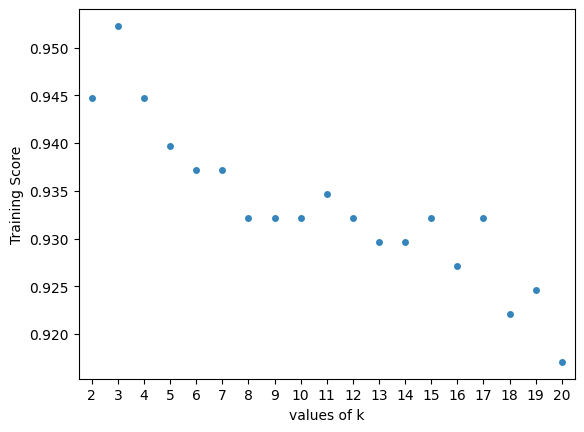

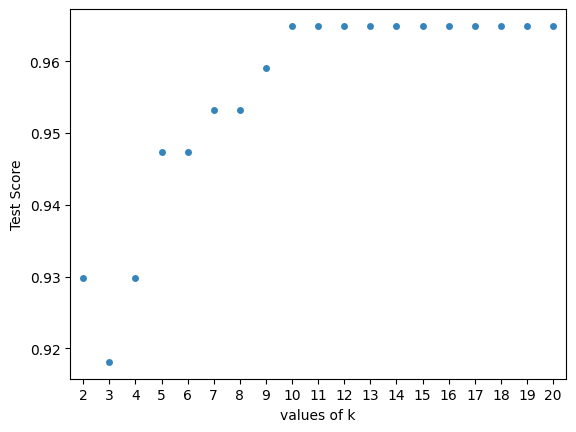

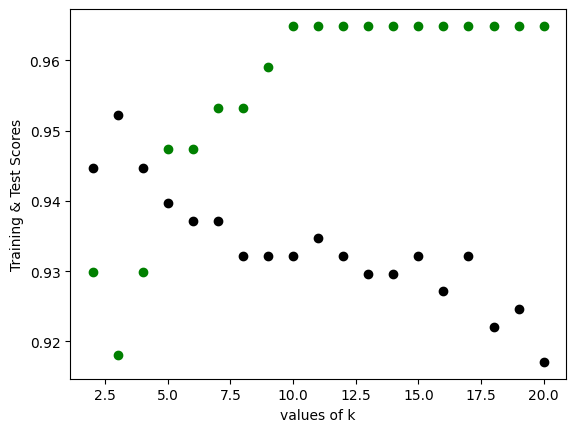


From the above scatter plot, we can come to the conclusion that the optimum value of kNN will be around 5, with delta of 0.007669928590320008.


In [1]:

# https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print()
print('KERAS VERSION: %s'%sklearn.__version__)
print()

# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download
!git clone https://github.com/frank-morales2020/MLxDL.git
df = pd.read_csv('/content/MLxDL/data.csv')

y = df['diagnosis']

X = df.drop('diagnosis', axis = 1)
X = X.drop('Unnamed: 32', axis = 1)
X = X.drop('id', axis = 1)

# Separating the dependent and independent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Splitting the data into training and testing data
K = []
training = []
test = []
scores = {}
delta = []

for k in range(2,21):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  g=training_score-test_score
  if g<0:
     g=g*-1
  K.append(k)
  training.append(training_score)
  test.append(test_score)
  delta.append(g)
  scores[k] = [training_score, test_score]

import numpy as np
print()
#print(delta)
knn_score=min(delta)
#print(max(delta))
index_final=np.where(delta==knn_score)[0][0]
optimun_value = K[index_final]
#print(K[index_final])
# import numpy package

import numpy as np
#print("First index value of %s is: "%knn_score,np.where(delta==knn_score)[0][0])
print()

#for keys, values in scores.items():
#    print(keys, ':', values)

ax = sns.stripplot(x=K, y=training, alpha=0.9)
ax.set(xlabel ='values of k', ylabel ='Training Score')
plt.show()

# function to show plot
print()

ax = sns.stripplot(x=K, y=test, alpha=0.9);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()
print()

#ax.set(xlabel ='values of k', ylabel ='Training & Test Scores')
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.xlabel("values of k")
plt.ylabel("Training & Test Scores")
plt.show()
print()
# For overlapping scatter plots
comment="From the above scatter plot, we can come to the conclusion that the optimum value of kNN will be around %s, with delta of %s."%(optimun_value,knn_score)
print(comment)